In [74]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_csv = pd.read_csv(city_data_to_load)
ride_csv = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

city_ride_df = pd.merge(city_csv, ride_csv, on="city", how="left")

# Display the data table for preview

city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


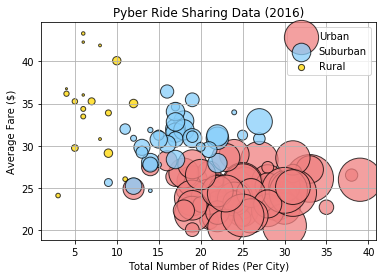

In [97]:
# Obtain the x and y coordinates for each of the three city types

x = city_ride_df.groupby(["city", "type"]).count()

x = x.reset_index()

x = x.set_index("city")


y = city_ride_df.groupby(["city", "type"]).mean()

y = y.reset_index()

y = y.set_index("city")


z = city_ride_df.groupby(["city", "type"]).sum()

z = z.reset_index()

z = z.set_index("city")

rural_total_rides = x.loc[x["type"] == "Rural"]["ride_id"]
rural_avg_fare = round(y.loc[y["type"] == "Rural"]["fare"],2)
rural_driver_count = z.loc[z["type"] == "Rural"]["driver_count"]

sub_total_rides = x.loc[x["type"] == "Suburban"]["ride_id"]
sub_avg_fare = round(y.loc[y["type"] == "Suburban"]["fare"],2)
sub_driver_count = z.loc[z["type"] == "Suburban"]["driver_count"]

urb_total_rides = x.loc[x["type"] == "Urban"]["ride_id"]
urb_avg_fare = round(y.loc[y["type"] == "Urban"]["fare"],2)
urb_driver_count = z.loc[z["type"] == "Urban"]["driver_count"]

# Build the scatter plots for each city types

plt.scatter(urb_total_rides, urb_avg_fare, s=urb_driver_count, marker ="o", color="lightcoral", alpha=0.75, edgecolors="black")
plt.scatter(sub_total_rides, sub_avg_fare, s=sub_driver_count, marker ="o", color="lightskyblue", alpha=0.75, edgecolors="black")
plt.scatter(rural_total_rides, rural_avg_fare, s=rural_driver_count, marker ="o", color="gold", alpha=0.75, edgecolors="black")
plt.grid()

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")



# Create a legend
plt.legend(["Urban", "Suburban", "Rural"],loc="best", scatterpoints=1)

# Incorporate a text label regarding circle size


plt.show()
# Save Figure

In [135]:
# Calculate Type Percents
total_fare = city_ride_df["fare"]

sum_total_fare = total_fare.sum()

zz = city_ride_df.groupby("type").sum()

zz = zz.reset_index()

zz = zz.set_index("ride_id")

total_fare_rural = round(zz.loc[zz["type"]=="Rural"]["fare"])

rural_pct = round(total_fare_rural / sum_total_fare * 100,1)

total_fare_sub = round(zz.loc[zz["type"]=="Suburban"]["fare"])

sub_pct = round(total_fare_sub / sum_total_fare * 100,1)

total_fare_urb = round(zz.loc[zz["type"]=="Urban"]["fare"])

urb_pct = round(total_fare_urb / sum_total_fare * 100,1)

types = []

# Build Pie Chart

plt.title("% of Total Fares by City Type")
plt.pie()

# Save Figure
    

ride_id
7919412664056093    62.7
Name: fare, dtype: float64